the width of image is:  90
the hight of image is:  75


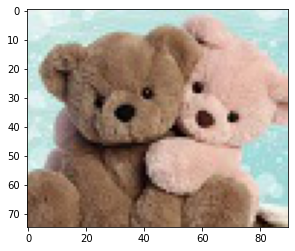

In [34]:
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
from clustering_algorithms import kmeans, dbscan

# Load an image:
# use below image path for k means since it gives better view 
image_path = './images/image.jpg'

# use below image path for dbscan for faster processing
# image_path = './images/image2.jpg'

image = Image.open(image_path)
pixels = image.load()
width, height = image.size

#printing (r,g,b) values of first pixel
#print(pixels[1,1])

print("the width of image is: ",width)
print("the hight of image is: ",height)

# Display image in notebook:
%matplotlib inline
imshow(np.asarray(image))

In [35]:
# Turn image into list of vectors (1 vector / pixel):
#vector_list stores a list of elements where each elements represent (r,g,b) values for each pixel in image
vector_list = []


#iterating through each pixel row wise
for x in range(width):
    for y in range(height):
        current_point = []
        current_point.append(pixels[x, y][0])
        current_point.append(pixels[x, y][1])
        current_point.append(pixels[x, y][2])

        current_vector = np.array(current_point)
        vector_list.append(current_vector)

print('Image file with dimensions {}x{} pixels turned into {} vectors.'.format(width, height, len(vector_list)))

print(len(vector_list))

Image file with dimensions 90x75 pixels turned into 6750 vectors.
6750


In [36]:
#Perform clustering on the vectors:

#Uncomment below line when running dbscan
# dbscan_clusters = dbscan(vector_list, minpts=2, epsilon=5)

#Uncomment below line when running kmeans
kmeans_clusters = kmeans(vector_list, 5)

vectors list 6750
list clusters 6750


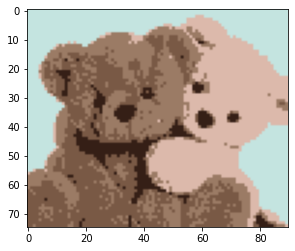

In [37]:
# Convert the clusters back into an image:
# This code assumes that the result is a list that
# is as long as the list of points and contains the 
# cluster number for each point with the corresponding
# position in the list.
# E. g. [1, 4, 2, 1, 1, 4, 2, 2, 3, ...])

# Printing the values of data points clusters
print("vectors list",len(vector_list))

print("list clusters",len(kmeans_clusters))
# print("list clusters",len(dbscan_clusters))

def clusters_to_image(cluster_per_point_list: list, points: list, width, height):
    assert(len(cluster_per_point_list) == len(points))

    cluster_count = max(cluster_per_point_list) + 1
    inverted_clusters = [[] for _ in range(cluster_count)]

    for i in range(len(cluster_per_point_list)):
        inverted_clusters[cluster_per_point_list[i]].append(points[i])

    mean_colors = [np.array([0, 0, 0]) for _ in range(cluster_count)]
    counter =  [0 for _ in range(cluster_count)]
    for i in range(cluster_count):
        for elem in inverted_clusters[i]:
            mean_colors[i] = np.add(mean_colors[i], elem)
            counter[i] += 1

        mean_colors[i] = np.divide(mean_colors[i], np.array([counter[i], counter[i], counter[i]]))

    clustered_image = Image.new('RGB', (width, height))
    pix = clustered_image.load()
    for x in range(width):
        for y in range(height):
            cl_id = cluster_per_point_list[y + x * height]
            if cl_id == -1:
                pix[x, y] = (0, 0, 0)
            else:
                curr_pixel = [int(x) for x in mean_colors[cl_id]]
                pix[x, y] = tuple(curr_pixel)

    return clustered_image

clustered_image = clusters_to_image(
    kmeans_clusters, vector_list, width, height)

# clustered_image = clusters_to_image(
#     dbscan_clusters, vector_list, width, height)

# Display the clustered image:
%matplotlib inline
imshow(np.asarray(clustered_image))